In [1]:
# We will use (1) the paid or free personnel information dataset for each station of Seoul Subway Line in 2020 and (2) the statistics dataset for facilities for subway convenience in Seoul.
# (1)is a dataset that tells you how many people use it for free or for paid at each station for each line.
# For ease of viewing, the number of passengers on board is marked with O and the number of people getting off is marked with X.
# And the number of people who get on and off for free is those who use free transportation cards issued to senior citizens aged 65 or older, disabled people, and people of national merit.
# Here, we will focus on information on the number of free riders by line.
# (2)is a dataset that tells you how many convenience facilities such as escalators and elevators are arranged on each line.

# Our group chose two datasets for the purpose of comparing the number of free riders by line and the number of facilities installed for boarding and boarding to identify routes that lack boarding facilities and predict how much more facilities to increase.

# We developed and learned the model using two algorithms, KNN and linear regression.
# First, I will show you the information about the dataset we selected.
#df1 is a dataset showing the number of free passengers and the number of paid passengers by line.
#df2 is a dataset that shows the type and number of convenience facilities by line.

# Relationship between Free Riders and Convenience Facilities: Free Riders are the elderly, the people of national merit, etc.
# We think we should increase the number of convenience facilities on the subway line that many of these people ride.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel('Subway fee count.xlsx')
df2 = pd.read_excel('sub.xlsx')

In [3]:
df1.info()
print("")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        3802 non-null   int64 
 1   Line         3802 non-null   object
 2   Subway       3802 non-null   object
 3   paid user O  3802 non-null   int64 
 4   free user O  3802 non-null   int64 
 5   paid user X  3802 non-null   int64 
 6   free user X  3802 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 208.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Line                      9 non-null      object
 1   Count of subway           9 non-null      int64 
 2   Count of Elevator         9 non-null      int64 
 3   Count of Escalator        9 non-null      int64 
 4   Count of Wheelchair lift  9 non-null      i

In [4]:
df1.describe() #statistics

,Month,paid user O,free user O,paid user X,free user X
count,3802.000000,3.802000e+03,3802.000000,3.802000e+03,3802.000000
mean,202006.509206,3.067100e+05,54975.527880,3.073816e+05,54271.766702
std,3.453383,2.745877e+05,41563.288814,2.795120e+05,41172.908228
min,202001.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,202004.000000,1.366938e+05,27297.750000,1.341100e+05,26863.250000
50%,202007.000000,2.308805e+05,44916.000000,2.252725e+05,44153.500000
75%,202010.000000,3.799470e+05,69377.000000,3.817612e+05,68723.250000
max,202012.000000,2.784689e+06,364104.000000,2.866156e+06,360747.000000


In [5]:
df2.describe() #statistics

,Count of subway,Count of Elevator,Count of Escalator,Count of Wheelchair lift,Count of Moving walkway
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,35.333333,109.888889,273.777778,16.333333,2.666667
std,15.247951,49.133605,206.974502,13.937360,4.123106
min,10.000000,36.000000,33.000000,2.000000,0.000000
25%,26.000000,77.000000,116.000000,8.000000,0.000000
50%,38.000000,110.000000,228.000000,12.000000,0.000000
75%,50.000000,157.000000,379.000000,23.000000,4.000000
max,53.000000,164.000000,670.000000,42.000000,12.000000


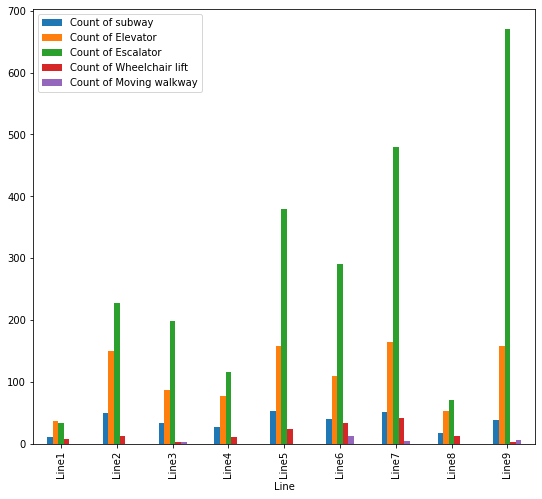

In [6]:
#bar chart of the number of facilities for the elderly and the weak by subway line
df3=pd.DataFrame(df2,columns=["Line","Count of subway","Count of Elevator","Count of Escalator","Count of Wheelchair lift","Count of Moving walkway"])
df3.plot(x="Line", y=["Count of subway","Count of Elevator","Count of Escalator","Count of Wheelchair lift","Count of Moving walkway"], kind="bar",figsize=(9,8))
plt.show()

In [7]:
df1

,Month,Line,Subway,paid user O,free user O,paid user X,free user X
0,202012,Line1,a1,284517,180822,288101,174176
1,202012,Line1,a2,305614,187492,275379,175042
2,202012,Line1,a3,708925,133421,674149,123397
3,202012,Line1,a4,169229,88712,158990,87422
4,202012,Line1,a5,193158,192893,189518,206219
...,...,...,...,...,...,...,...
3797,202001,Line9,j34,122089,32062,120441,32038
3798,202001,Line9,j35,242772,24844,241782,24710
3799,202001,Line9,j36,182141,29647,152869,25190
3800,202001,Line9,j37,98588,23917,105463,24523


In [8]:
df2

,Line,Count of subway,Count of Elevator,Count of Escalator,Count of Wheelchair lift,Count of Moving walkway
0,Line1,10,36,33,8,0
1,Line2,50,149,228,12,0
2,Line3,34,87,198,2,2
3,Line4,26,77,116,11,0
4,Line5,53,157,379,23,0
5,Line6,39,110,291,34,12
6,Line7,51,164,479,42,4
7,Line8,17,52,70,13,0
8,Line9,38,157,670,2,6


In [9]:
df1.isnull().sum() #Fine df1 Missing Values

Month          0
Line           0
Subway         0
paid user O    0
free user O    0
paid user X    0
free user X    0
dtype: int64

In [10]:
df2.isnull().sum() #Fine df2 Missing Values

Line                        0
Count of subway             0
Count of Elevator           0
Count of Escalator          0
Count of Wheelchair lift    0
Count of Moving walkway     0
dtype: int64

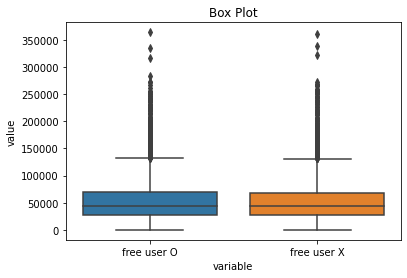

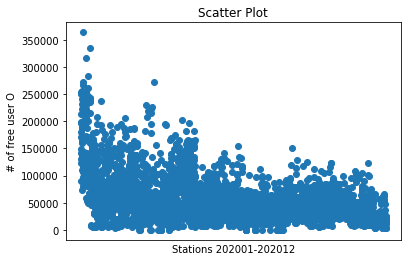

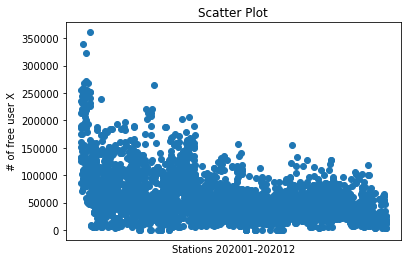

c:\users\82106\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


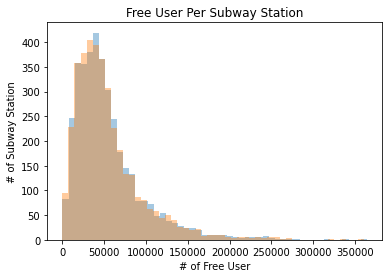

In [11]:
# Plot (Box, Scatter, distplot) for df1

df1_free = df1.loc[:,['free user O', 'free user X']]

# BoxPlot
df1_free_melted = pd.melt(df1_free)
plt.title('Box Plot')
sns.boxplot(x='variable', y='value', data=df1_free_melted)
plt.show()

# relationship between subway line and free user O/X
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.scatter(df1['Subway'], df1['free user O'])
plt.xlabel('Stations 202001-202012')
plt.ylabel('# of free user O')
plt.title('Scatter Plot')
plt.show()

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.scatter(df1['Subway'], df1['free user X'])
plt.xlabel('Stations 202001-202012')
plt.ylabel('# of free user X')
plt.title('Scatter Plot')
plt.show()

# distplot
sns.distplot(df1['free user O'],  kde=False, label='Free User O')
sns.distplot(df1['free user X'],  kde=False, label='Free User X')
plt.title('Free User Per Subway Station')
plt.xlabel('# of Free User')
plt.ylabel('# of Subway Station')
plt.show()

In [12]:
# Outliers
# Having large number is not an outlier, having 'too' small number is. (such as 0)
# Since all subway stations with outlier have 0 for 'free user X' in the data, we decided to used that feature to figure out the outliers  

df1_outlier = df1[df1['free user X']==0]

df1_outlier = df1_outlier.drop_duplicates(['Subway'])

df1_outlier = df1_outlier.sort_values(by='Subway')

df1_outlier.reset_index()


,index,Month,Line,Subway,paid user O,free user O,paid user X,free user X
0,1332,202008,Line3,c1,16,1,0,0
1,1662,202007,Line3,c13,27,2,0,0
2,2295,202005,Line3,c14,26,2,0,0
3,1967,202006,Line3,c2,21,2,0,0
4,2934,202003,Line3,c21,16,0,0,0
5,83,202012,Line3,c24,13,2,0,0
6,2629,202004,Line3,c32,15,1,0,0
7,1762,202007,Line6,f53,6,0,0,0
8,2404,202005,Line6,g10,12,6,0,0
9,1460,202008,Line6,g16,9,1,0,0


In [13]:
# Total number of free passengers by Line

line_groups = df1.groupby(['Line'])

line_free_sum = pd.DataFrame(line_groups['free user O', 'free user X'].sum())
line_free_sum['free user sum'] = line_free_sum.sum(axis=1)

line_free_sum

c:\users\82106\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,free user O,free user X,free user sum
Line,,,
Line1,18937898,18684704,37622602
Line2,45255901,44685995,89941896
Line3,24242466,23760105,48002571
Line4,24417915,24365476,48783391
Line5,28223519,27942583,56166102
Line6,15965586,15697757,31663343
Line7,29198081,28902930,58101011
Line8,9505945,9261484,18767429
Line9,13269646,13040223,26309869


In [14]:

#Use scaling to ensure that the values of each feature follow a certain range or rule (MinMaxScaler, StandardScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(line_free_sum)

line_free_scaled = scaler.transform(line_free_sum)

line_free_scaled_df = pd.DataFrame(line_free_scaled, columns=['free user O', 'free user X', 'free user sum'])

line_free_scaled_df

,free user O,free user X,free user sum
0,0.263831,0.266008,0.264915
1,1.000000,1.000000,1.000000
2,0.412211,0.409282,0.410753
3,0.417119,0.426371,0.421724
4,0.523569,0.527350,0.525451
5,0.180689,0.181690,0.181187
6,0.550830,0.554459,0.552636
7,0.000000,0.000000,0.000000
8,0.105278,0.106670,0.105971


In [15]:
from sklearn.preprocessing import StandardScaler

scaler_ = StandardScaler()
scaler_.fit(line_free_sum)

line_free_scaled_ = scaler_.transform(line_free_sum)

line_free_scaled__df = pd.DataFrame(line_free_scaled_, columns=['free user O', 'free user X', 'free user sum'])

line_free_scaled__df

,free user O,free user X,free user sum
0,-0.426991,-0.426147,-0.426578
1,2.194804,2.185852,2.190382
2,0.101449,0.083710,0.092618
3,0.118927,0.144524,0.131674
4,0.498041,0.503867,0.500950
5,-0.723093,-0.726205,-0.724654
6,0.595127,0.600341,0.597732
7,-1.366601,-1.372771,-1.369695
8,-0.991662,-0.993172,-0.992430


In [16]:
# Total number of Convienience facility by line

facility_sum = df2.drop('Count of subway', axis=1)
facility_sum = facility_sum.set_index('Line')
facility_sum['facility sum'] = facility_sum.sum(axis=1)

facility_sum

,Count of Elevator,Count of Escalator,Count of Wheelchair lift,Count of Moving walkway,facility sum
Line,,,,,
Line1,36,33,8,0,77
Line2,149,228,12,0,389
Line3,87,198,2,2,289
Line4,77,116,11,0,204
Line5,157,379,23,0,559
Line6,110,291,34,12,447
Line7,164,479,42,4,689
Line8,52,70,13,0,135
Line9,157,670,2,6,835


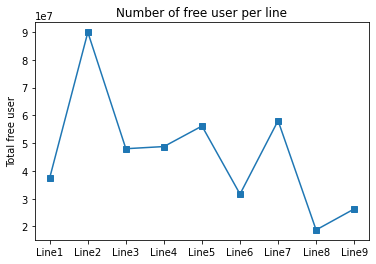

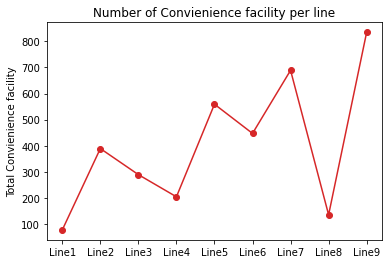

In [17]:

#Display the number of free passengers on each line
color_1 = 'tab:blue'
plt.ylabel('Total free user')
plt.plot(line_free_sum['free user sum'], marker='s', color=color_1)
plt.title('Number of free user per line')
plt.show()

#Display the number of convenience facilities per line
color_2 = 'tab:red'
plt.ylabel('Total Convienience facility')
plt.plot(facility_sum['facility sum'], marker='o', color=color_2)
plt.title('Number of Convienience facility per line')
plt.show()

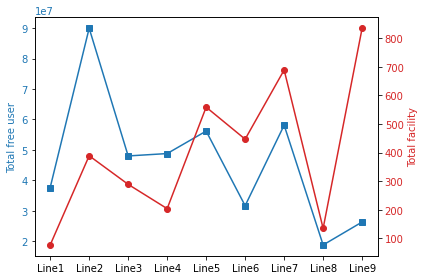

In [18]:
## plot with Total free user and Total facility
# left side

fig, ax1 = plt.subplots()
ax1.set_ylabel('Total free user', color=color_1)
ax1.plot(line_free_sum['free user sum'], marker='s', color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)



# right side
ax2 = ax1.twinx()
ax2.set_ylabel('Total facility', color=color_2)
ax2.plot(facility_sum['facility sum'], marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()
plt.show()

# As can be seen from the table, some lines have significantly fewer convenience facilities than the number of free passengers, and vice versa.
# For example, convenience facilities on Line 2 are significantly lower than free passengers, and convenience facilities on Line 9 are significantly higher than free passengers.
# If so, we will learn the model through the algorithm and check whether these results can be derived with predictions.

In [19]:
# get outliers index
indexss = df1_outlier.index

# turn outliers into null value
for x in indexss:
    df1.iloc[x,3:7] = None

# collect subway that has null value
subway_list=[]
for i in indexss:
    subway_list.append(df1.iloc[i, 2])


subway_list = list(set(subway_list))

subway_list.sort()

In [20]:
# fillna with each subway's mean value
import math

for x in subway_list:
    df1_sub = df1[df1['Subway']==x]
    
    # mean for each column (paid user O/X, free user O/X)
    mean_pO = math.trunc(df1_sub.iloc[:,3].mean())
    mean_fO = math.trunc(df1_sub.iloc[:,4].mean())
    mean_pX = math.trunc(df1_sub.iloc[:,5].mean())
    mean_fX = math.trunc(df1_sub.iloc[:,6].mean())

    # fillna
    df1_sub['paid user O'] = df1_sub['paid user O'].fillna(mean_pO)
    df1_sub['free user O'] = df1_sub['free user O'].fillna(mean_fO)
    df1_sub['paid user X'] = df1_sub['paid user X'].fillna(mean_pX)
    df1_sub['free user X'] = df1_sub['free user X'].fillna(mean_fX)

    df1[df1['Subway']==x] = df1_sub

c:\users\82106\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\82106\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
c:\users\82106\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [21]:
df1.isnull().sum()

Month          0
Line           0
Subway         0
paid user O    0
free user O    0
paid user X    0
free user X    0
dtype: int64

In [22]:
# Encoding column 'line' and 'subway' with LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df1['Line'] = le.fit_transform(df1['Line'])

df1['Subway'] = le.fit_transform(df1['Subway'])

In [23]:
# KNN classification
from sklearn.neighbors import KNeighborsClassifier

# prepare the KNN (neighbor 3)
neigh = KNeighborsClassifier(n_neighbors=3)

# X_train for users
# y_train (target) for line
X_train = np.array(df1.iloc[:,3:])
y_train = np.array(df1['Line'])

neigh.fit(X_train, y_train)

# predict
y_pred = neigh.predict(X_train)

In [24]:
# Create a total dataframe(Display the total number of free passengers and convenience facilities by line)
total_df = pd.merge(line_free_sum['free user sum'], facility_sum['facility sum'], on='Line')
total_df

,free user sum,facility sum
Line,,
Line1,37622602,77
Line2,89941896,389
Line3,48002571,289
Line4,48783391,204
Line5,56166102,559
Line6,31663343,447
Line7,58101011,689
Line8,18767429,135
Line9,26309869,835


In [25]:
# Sort by number of users
total_df = total_df.sort_values('free user sum')

# Convert dataframe to array
line_sum_array = total_df['free user sum'].values
facility_sum_array = total_df['facility sum'].values

In [26]:
from sklearn.model_selection import train_test_split

# Split training data and test data
X = line_sum_array
y = facility_sum_array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [27]:
from sklearn.linear_model import LinearRegression

# Linear Regression
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

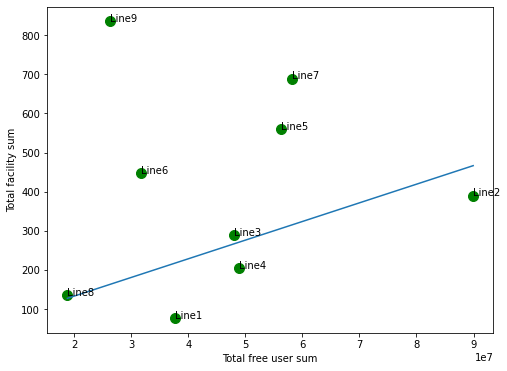

In [28]:
# Visualization:
# Lines sorted by the number of users are used as point names
annotations=["Line8","Line9","Line6","Line1","Line3", "Line4", "Line5", "Line7", "Line2"]

plt.figure(figsize=(8,6))
plt.scatter(X,y,s=100,color="green")
plt.xlabel("Total free user sum")
plt.ylabel("Total facility sum")

for i, label in enumerate(annotations):
    plt.text(X[i], y[i], label)


plt.plot(X,model.predict(X.reshape(-1, 1)))
plt.show()

# We derived predictions through algorithms.
# According to the results, the lines above the straight line representing the predicted value are more convenience facilities than free riders
# The lines below the straight line mean that the convenience facilities are smaller than the number of free passengers.
# Based on these predictions, it is possible to confirm that Line 1 and Line 4 and Line 2 lack convenience facilities and how much more they need to be increased.

# Lines 1, 2, and 4 are older, so there are relatively few convenience facilities
# It can be seen that Line 9 has many convenience facilities as it has been installed most recently.
# The budget can be efficiently distributed by installing convenience facilities suitable for the number of free passengers on each line.
# If you could know the number of amenities by station,
# I think it will be possible to install convenience facilities efficiently at each station by subdividing them a little more.

In [29]:
# K-Fold Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)
# scores = cross_val_score(model, X.reshape(-1, 1), y, scoring="neg_mean_absolute_error", cv=cv)
scores = cross_val_score(model, X.reshape(-1, 1), y, scoring="neg_mean_absolute_error", cv=cv)

print('K-Fold Cross-Validation')
print('NMAE : %.3f (%.3f)' %(np.mean(scores), np.std(scores)))
print()

K-Fold Cross-Validation
NMAE : -257.970 (63.813)

